#Question # 1.2

In [ ]:
#Data 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.mixture import GaussianMixture
import math
from sklearn.metrics import accuracy_score


sigma= [0.5, 1, 2, 4, 8]

mean1 = np.array([-1, -1])
cov1 = np.array([[2, 0.5], [0.5, 1]])

mean2 = np.array([1, -1])
cov2 = np.array([[1, -0.5], [-0.5, 2]])

mean3 = np.array([0, 1])
cov3 = np.array([[1, 0], [0, 2]])



In [ ]:
actual_labels = np.concatenate((np.zeros(100, dtype='int'), 
                               np.ones(100, dtype='int'),
                               np.ones(100, dtype='int') + np.ones(100, dtype='int')),axis=0)

In [ ]:
actual_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
def J_obj(data, labels, centers):
  n = len(data)
  K = len(centers)
  J=0
  for i in range(n):
    for k in range(K):
      if(k ==labels[i]):
        J+=math.dist(data[i],centers[k])**2
  return J

In [ ]:
def KM(data):
  kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(data)
  kmeans_lables = kmeans.labels_
  kmeans_centers = kmeans.cluster_centers_
  kmeans_labels, kmeans_centers= mapping(kmeans_centers, kmeans_lables, mean1, mean2, mean3)
  kmeans_obj = J_obj(data, kmeans_lables , kmeans_centers)
  print("Kmeans Objevtive Value: ", kmeans_obj)
  kmeans_acc = accuracy_score(kmeans_labels,actual_labels)
  print("Accuracy for Kmeans: ", kmeans_acc)
  #print(kmeans_obj)
  #print(kmeans_lables)
  #print(kmeans_centers)
  return kmeans_acc, kmeans_obj

In [ ]:
def mapping(centeroids, labels, mean1, mean2, mean3):
  cluster_label=[]
  centers = [0,0,0]
  for i in range(len(centeroids)):
    dist = []
    dist.append(math.dist(centeroids[i],mean1))
    dist.append(math.dist(centeroids[i],mean2))
    dist.append(math.dist(centeroids[i],mean3))
    cluster_label.append(dist.index(min(dist)))
  #print("Redefining cluster labels: ",cluster_label)
  for i in range(len(centeroids)):
    if cluster_label[i] == 0:
      centers[0] = centeroids[i]
    elif cluster_label[i] == 1:
      centers[1] = centeroids[i]
    elif cluster_label[i] == 2:
      centers[2] = centeroids[i]

  #print("re mapped centeroids: ", centers)
  for i in range(len(labels)):
    if labels[i] == 0:
      labels[i] = cluster_label[0]
    elif labels[i] == 1:
      labels[i] = cluster_label[1]
    elif labels[i] == 2:
      labels[i] = cluster_label[2]
  return labels, centers



In [ ]:
def GMM(data):
  gm = GaussianMixture(n_components=3, random_state=0).fit(data)
  gmm_ypred = gm.predict(data)
  gmm_centers = gm.means_
  gmm_labels, gmm_centers= mapping(gmm_centers, gmm_ypred, mean1, mean2, mean3)
  gmm_loglikelihood = np.sum(gm.score_samples(data))
  print("GMM Log Likelihood: ",gmm_loglikelihood)
  gmm_acc = accuracy_score(gmm_labels,actual_labels)
  print("Accuracy for GMM: ", gmm_acc)
  #print(gmm_loglikelihood)
  #print(gmm_centers)
  #print(gmm_labels)
  return gmm_acc, gmm_loglikelihood


In [ ]:
KM_objectives=[]
GMM_objectives=[]
KM_accuracy=[]
GMM_accuracy=[]
for each in sigma:
  print("\n\nFor the value of Sigma = ",each,"\n\n")
  A = np.random.multivariate_normal(mean1, each*cov1, 100)
  B = np.random.multivariate_normal(mean2, each*cov2, 100)
  C = np.random.multivariate_normal(mean3, each*cov3, 100)

  data = np.concatenate((A,B,C), axis=0)
  
  KM_acc, KM_obj = KM(data)
  GMM_acc, GMM_logLH = GMM(data)
  KM_objectives.append(KM_obj)
  KM_accuracy.append(KM_acc)
  GMM_objectives.append(GMM_logLH)
  GMM_accuracy.append(GMM_acc)




For the value of Sigma =  0.5 


Kmeans Objevtive Value:  331.1925090007241
Accuracy for Kmeans:  0.8166666666666667
GMM Log Likelihood:  -939.495753151143
Accuracy for GMM:  0.8266666666666667


For the value of Sigma =  1 


Kmeans Objevtive Value:  576.9573362091559
Accuracy for Kmeans:  0.6966666666666667
GMM Log Likelihood:  -1067.058203241394
Accuracy for GMM:  0.6666666666666666


For the value of Sigma =  2 


Kmeans Objevtive Value:  906.3166915872443
Accuracy for Kmeans:  0.6333333333333333
GMM Log Likelihood:  -1210.033692869281
Accuracy for GMM:  0.5966666666666667


For the value of Sigma =  4 


Kmeans Objevtive Value:  1764.8423378560326
Accuracy for Kmeans:  0.5633333333333334
GMM Log Likelihood:  -1426.2768003701744
Accuracy for GMM:  0.56


For the value of Sigma =  8 


Kmeans Objevtive Value:  2969.577099052318
Accuracy for Kmeans:  0.5033333333333333
GMM Log Likelihood:  -1586.930228796156
Accuracy for GMM:  0.49666666666666665


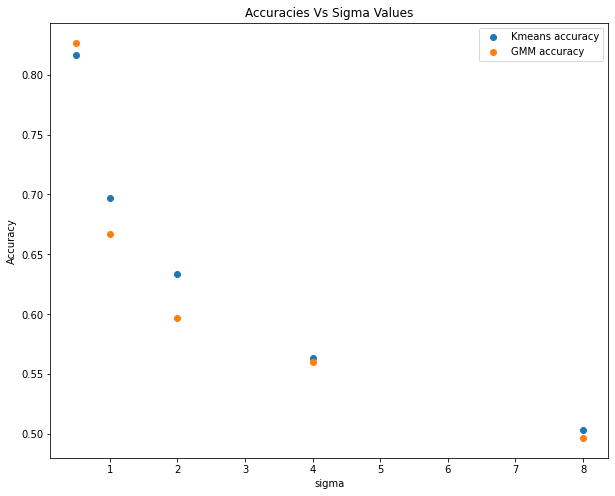

In [ ]:
plt.figure(figsize=(10,8)) 
plt.scatter(sigma, KM_accuracy)
plt.scatter(sigma, GMM_accuracy)
plt.legend(['Kmeans accuracy', 'GMM accuracy'])
plt.xlabel('sigma')
plt.ylabel('Accuracy')
plt.title('Accuracies Vs Sigma Values')
plt.show()

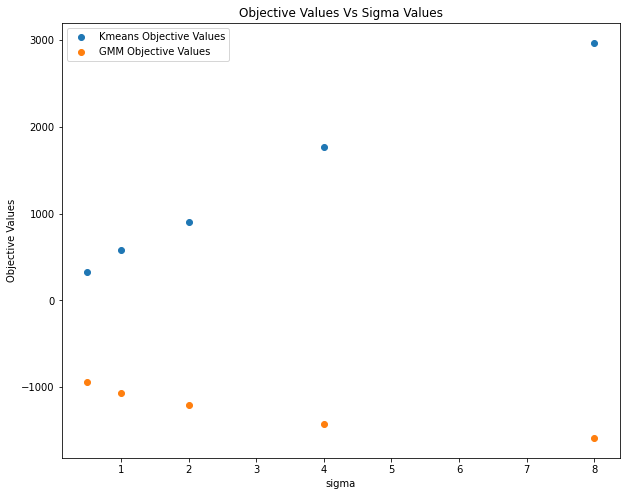

In [ ]:
plt.figure(figsize=(10,8)) 
plt.scatter(sigma, KM_objectives)
plt.scatter(sigma, GMM_objectives)
plt.legend(['Kmeans Objective Values', 'GMM Objective Values'])
plt.xlabel('sigma')
plt.ylabel('Objective Values')
plt.title('Objective Values Vs Sigma Values')
plt.show()

#Question # 2.4


In [1]:
import numpy as np
import pandas as pd
import numpy.linalg as la
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from numpy.testing import assert_array_almost_equal
import matplotlib.pyplot as plt


np.set_printoptions(precision=3)

D2data = pd.read_csv('data2D.csv', header=None, index_col=None)
D1000data = pd.read_csv('data1000D.csv', header=None, index_col=None)



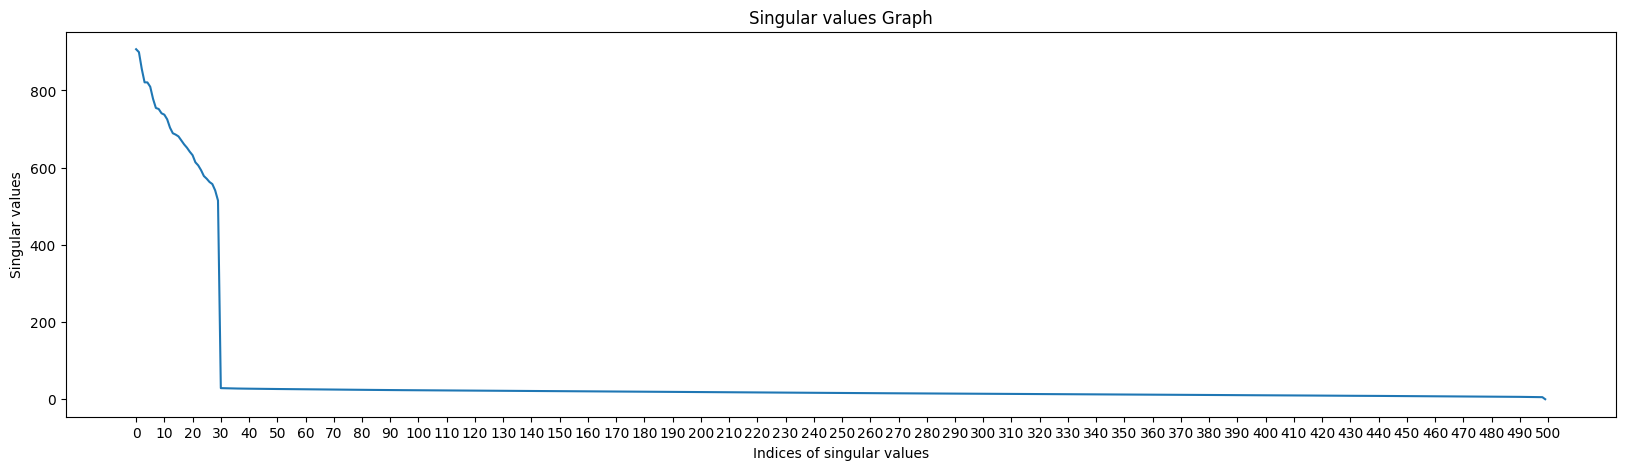

In [2]:
U, S, VT = np.linalg.svd((D1000data - D1000data.mean()))
plt.figure(figsize=(20,5))
plt.plot(S)
plt.xticks(np.arange(0, len(S)+1, 10))
plt.xlabel('Indices of singular values')
plt.ylabel('Singular values')
plt.title('Singular values Graph')
plt.show()

In [3]:
def PCA_with_svd(data, d=1, PCAtype=0, plot=True):
  """
  PCA type --> 0 for Buggy PCA, 1 for Demeaned PCA, 2 for Normalized PCA
  d is the number of dimensions upto which decomposition should happen
  data is the type of data

  default parameters are for 2D data
  """

  if(PCAtype == 0):
    print("\n\nResults for Buggy PCA\n\n")
    mean = np.zeros(data.shape[1])
    std = np.ones(data.shape[1])
    title = 'Buggy PCA'
  elif(PCAtype == 1):
    print("\n\nResults for Demeaned PCA\n\n")
    mean = data.mean(axis=0)
    std = std = np.ones(data.shape[1])
    title = 'Demeaned PCA'
  elif(PCAtype == 2):
    print("\n\nResults for Normalized PCA\n\n")
    mean = data.mean(axis=0)
    std = data.std(axis=0)
    title = 'Normalized PCA'

  
  
  k = d
  #normalized_df=data.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
  U, S, VT = np.linalg.svd((data - mean) / std)
  components = VT[:k]
  print("PCA components shape: ",components.shape)
  data_pca = ((data - mean) / std).dot(components.T)
  print('Transformed data shape: ', data_pca.shape)

  data_projected = (data_pca.dot(components)* std) + mean
  
  print('Projected data shape :', data_projected.shape)
  re = np.sum((data - data_projected) ** 2, axis=1).mean()
  print("Reconstruction Error : ", re)
  if (plot):
    plt.figure(figsize = (4,4))
    plt.scatter(data[0].to_numpy(), data[1].to_numpy(), marker='*' )
    plt.scatter(data_projected[0].to_numpy(), data_projected[1].to_numpy(), marker='*' )
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Data scatter plot for '+title)
    plt.xlim([0,10])
    plt.ylim([0,10])



Results for Buggy PCA


PCA components shape:  (1, 2)
Transformed data shape:  (50, 1)
Projected data shape : (50, 2)
Reconstruction Error :  0.8869030837347941


Results for Demeaned PCA


PCA components shape:  (1, 2)
Transformed data shape:  (50, 1)
Projected data shape : (50, 2)
Reconstruction Error :  0.010006085628512908


Results for Normalized PCA


PCA components shape:  (1, 2)
Transformed data shape:  (50, 1)
Projected data shape : (50, 2)
Reconstruction Error :  0.04947208345477067


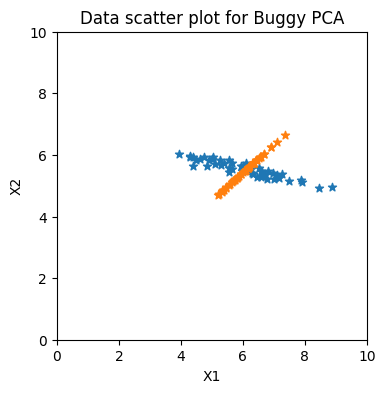

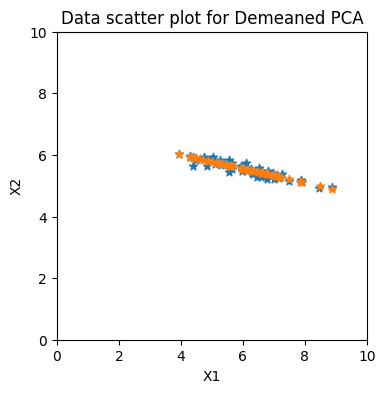

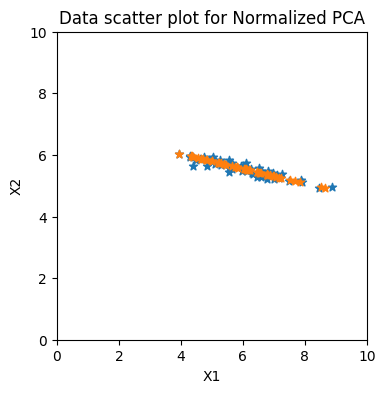

In [6]:
for i in range(3):
  PCA_with_svd(D2data, d=1, PCAtype=i, plot=True)

###Selection of d

In [7]:
def DRO(data, d=1, plot=True):
  """
  default parameters are for 2D data
  """
  data = data.to_numpy()
  components =[0, 0 ,0]
  n = data.shape[0]
  k = d
  b = data.mean(axis=0)
  U, S, VT = np.linalg.svd((data - b))
  print(U.shape, S.shape, VT.shape)
  S = np.diag(S)
  components[0] = U[:,:k]
  components[1] = S[:k,:k]
  components[2] = VT[:k]
  print("PCA components shape: ",len(components))
  print("Each components U, S and V shapes: ",components[0].shape, components[1].shape, components[2].shape)
  Z = np.sqrt(n)*components[0]
  A = ((1/np.sqrt(n))*(components[1] @ components[2])).T
  
  print('Transformed data shape: ', Z.shape)
  data_projected = (Z @ A.T) + b
  print('Projected data shape :', data_projected.shape)
  re = np.sum((data - data_projected) ** 2, axis=1).mean()
  print("Reconstruction Error for DRO: ", re)

  if (plot):
    plt.figure(figsize = (4,4))
    plt.scatter(data[:,0], data[:,1], marker='*' )
    plt.scatter(data_projected[:,0], data_projected[:,1], marker='*' )
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Data scatter plot for DRO')
    plt.xlim([0,10])
    plt.ylim([0,10])
  return Z, A, b, data_projected


(50, 50) (2,) (2, 2)
PCA components shape:  3
Each components U, S and V shapes:  (50, 1) (1, 1) (1, 2)
Transformed data shape:  (50, 1)
Projected data shape : (50, 2)
Reconstruction Error for DRO:  0.010006085628512911


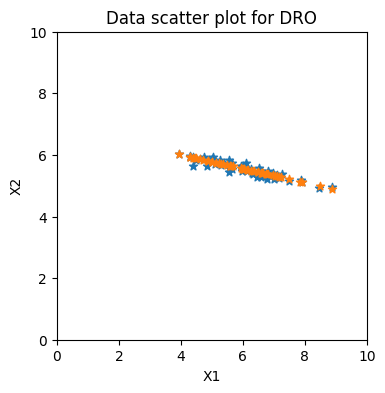

In [8]:
_, _, _, _ = DRO(D2data, 1, True)

In [9]:
def DRLV(data, d=1, plot=True, epochs=10):
  """
  default parameters are for 2D data
  """
  components =[0, 0 ,0]
  n = data.shape[0]
  D = data.shape[1]
  k = d
  
  #parameter initialization using DRO
  Z, A, b, Y = DRO(data, k, False)
  data = data.to_numpy()
  eta = np.sqrt(np.mean(np.mean((Y - data)**2)))

  for i in range(epochs):
    A, eta = EM(data, A, eta, b)
  
  print((np.linalg.inv( A @ A.T + eta**2 * np.identity(D)) @ A).shape)
  Z = (data - b.T) @ (np.linalg.inv( A @ A.T + eta**2 * np.identity(D)) @ A) ;

  print('Transformed data shape: ', Z.shape)
  data_projected = (Z @ A.T) + b
  print('Projected data shape :', data_projected.shape)
  re = np.sum((data - data_projected) ** 2, axis=1).mean()
  print("Reconstruction Error for DRLV : ", re)

  if (plot):
    plt.figure(figsize = (4,4))
    plt.scatter(data[:,0], data[:,1], marker='*' )
    plt.scatter(data_projected[:,0], data_projected[:,1], marker='*' )
    plt.xlabel('X1')

    plt.ylabel('X2')
    plt.title('Data scatter plot for DRLV')
    plt.xlim([0,10])
    plt.ylim([0,10])


In [10]:
def EM(data, A, eta, b):
  D = data.shape[1]
  d = A.shape[1]
  n = data.shape[0]
  ##E step
  K = ( A @ A.T ) + eta**2 * np.identity(D) #1000x1000
  Kinv = np.linalg.inv(K)
  RzxMeans = ((data - b.T) @ Kinv) @ A #500x30
  RzxVar = np.identity(d) - A.T @ Kinv @ A # 30x30
  EAZ = RzxMeans @ A.T #500x1000
  EAZ2 = np.sum( EAZ**2 , axis=1) + np.sum(np.diag(A @ RzxVar @ A.T)) # 500x1
  Xmb = (data - b.T) # 500x1000
  ##M step
  M1 = Xmb.T @ RzxMeans #1000x30
  M2 = RzxMeans.T @ RzxMeans + n * RzxVar; # 30x30
  ANew = M1 @ np.linalg.inv(M2);
  etaNew = np.sqrt(1/(n*D) * ((np.linalg.norm(Xmb,  ord='fro' ))**2 - 2 * np.sum(np.sum((Xmb* EAZ))) + np.sum(EAZ2)));
  return ANew, etaNew





(50, 50) (2,) (2, 2)
PCA components shape:  3
Each components U, S and V shapes:  (50, 1) (1, 1) (1, 2)
Transformed data shape:  (50, 1)
Projected data shape : (50, 2)
Reconstruction Error for DRO:  0.010006085628512911
(2, 1)
Transformed data shape:  (50, 1)
Projected data shape : (50, 2)
Reconstruction Error for DRLV :  0.01008121361364252


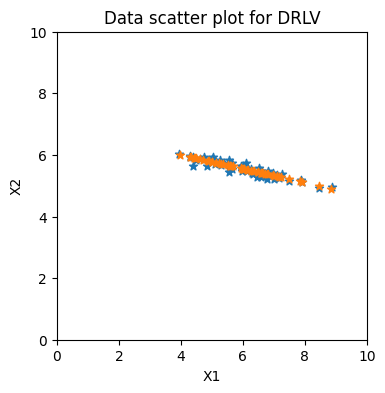

In [11]:
DRLV(D2data, 1, True, 10)